In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=01071e60f82779e8dba73cbcd944ce59


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tokur
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | estacion coahuila
Processing Record 5 of Set 1 | portland
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | samarai
Processing Record 9 of Set 1 | zwedru
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | macaubas
Processing Record 12 of Set 1 | kungurtug
Processing Record 13 of Set 1 | honiara
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | scottsbluff
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | bandundu
Processing Record 20 of Set 1 | waddan
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set 1 | mareeba
Processing Record 23 of Set 1 | sorland
Processing

Processing Record 40 of Set 4 | calatayud
Processing Record 41 of Set 4 | san jose
Processing Record 42 of Set 4 | tungkang
City not found. Skipping...
Processing Record 43 of Set 4 | saleaula
City not found. Skipping...
Processing Record 44 of Set 4 | gonbad-e qabus
Processing Record 45 of Set 4 | mirnyy
Processing Record 46 of Set 4 | pevek
Processing Record 47 of Set 4 | dejen
Processing Record 48 of Set 4 | saint-philippe
Processing Record 49 of Set 4 | weiden
Processing Record 50 of Set 4 | calahorra
Processing Record 1 of Set 5 | port elizabeth
Processing Record 2 of Set 5 | te anau
Processing Record 3 of Set 5 | malanje
Processing Record 4 of Set 5 | abu zabad
Processing Record 5 of Set 5 | manado
Processing Record 6 of Set 5 | chegutu
Processing Record 7 of Set 5 | conceicao do araguaia
Processing Record 8 of Set 5 | pimentel
Processing Record 9 of Set 5 | beloha
Processing Record 10 of Set 5 | faanui
Processing Record 11 of Set 5 | xichang
Processing Record 12 of Set 5 | jalu


Processing Record 30 of Set 8 | changtu
Processing Record 31 of Set 8 | pucallpa
Processing Record 32 of Set 8 | jumla
Processing Record 33 of Set 8 | kharp
Processing Record 34 of Set 8 | karlskrona
Processing Record 35 of Set 8 | ijaki
City not found. Skipping...
Processing Record 36 of Set 8 | potsdam
Processing Record 37 of Set 8 | warman
Processing Record 38 of Set 8 | aswan
Processing Record 39 of Set 8 | karratha
Processing Record 40 of Set 8 | saint george
Processing Record 41 of Set 8 | derzhavinsk
Processing Record 42 of Set 8 | borogontsy
Processing Record 43 of Set 8 | waynesville
Processing Record 44 of Set 8 | wattegama
Processing Record 45 of Set 8 | thio
Processing Record 46 of Set 8 | ilulissat
Processing Record 47 of Set 8 | zhuzhou
Processing Record 48 of Set 8 | heiligenhafen
Processing Record 49 of Set 8 | superior
Processing Record 50 of Set 8 | meybod
Processing Record 1 of Set 9 | kemijarvi
Processing Record 2 of Set 9 | ust-koksa
Processing Record 3 of Set 9 | 

Processing Record 21 of Set 12 | taganak
Processing Record 22 of Set 12 | singaraja
Processing Record 23 of Set 12 | progreso
Processing Record 24 of Set 12 | chalon-sur-saone
Processing Record 25 of Set 12 | jiazi
Processing Record 26 of Set 12 | sattur
Processing Record 27 of Set 12 | guarapari
Processing Record 28 of Set 12 | khor
Processing Record 29 of Set 12 | bam
Processing Record 30 of Set 12 | nguiu
City not found. Skipping...
Processing Record 31 of Set 12 | srandakan
Processing Record 32 of Set 12 | kaltan
Processing Record 33 of Set 12 | ucluelet
Processing Record 34 of Set 12 | flinders
Processing Record 35 of Set 12 | kinsale
Processing Record 36 of Set 12 | havre-saint-pierre
Processing Record 37 of Set 12 | half moon bay
Processing Record 38 of Set 12 | sale
Processing Record 39 of Set 12 | kidal
Processing Record 40 of Set 12 | aksha
Processing Record 41 of Set 12 | saint-georges
Processing Record 42 of Set 12 | swellendam
Processing Record 43 of Set 12 | kaeo
Processi

In [11]:
len(city_data)

577

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tokur,53.1333,132.9000,-3.55,93,100,4.00,RU,2021-11-21 22:01:03
1,Torbay,47.6666,-52.7314,30.76,79,13,4.00,CA,2021-11-21 22:01:03
2,Hermanus,-34.4187,19.2345,68.90,86,100,17.20,ZA,2021-11-21 21:59:05
3,Estacion Coahuila,32.1939,-115.0017,80.96,14,100,17.76,MX,2021-11-21 22:01:03
4,Portland,45.5234,-122.6762,55.47,81,75,3.00,US,2021-11-21 21:58:24
5,Qaanaaq,77.4840,-69.3632,-8.21,72,40,6.38,GL,2021-11-21 21:59:09
6,Thompson,55.7435,-97.8558,6.96,61,20,17.27,CA,2021-11-21 21:59:12
7,Samarai,-10.6167,150.6667,83.07,77,45,13.58,PG,2021-11-21 22:01:04
8,Zwedru,6.0667,-8.1281,74.86,91,67,3.67,LR,2021-11-21 22:01:04
9,Ushuaia,-54.8000,-68.3000,38.86,70,40,23.02,AR,2021-11-21 21:59:03


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tokur,RU,2021-11-21 22:01:03,53.1333,132.9000,-3.55,93,100,4.00
1,Torbay,CA,2021-11-21 22:01:03,47.6666,-52.7314,30.76,79,13,4.00
2,Hermanus,ZA,2021-11-21 21:59:05,-34.4187,19.2345,68.90,86,100,17.20
3,Estacion Coahuila,MX,2021-11-21 22:01:03,32.1939,-115.0017,80.96,14,100,17.76
4,Portland,US,2021-11-21 21:58:24,45.5234,-122.6762,55.47,81,75,3.00
5,Qaanaaq,GL,2021-11-21 21:59:09,77.4840,-69.3632,-8.21,72,40,6.38
6,Thompson,CA,2021-11-21 21:59:12,55.7435,-97.8558,6.96,61,20,17.27
7,Samarai,PG,2021-11-21 22:01:04,-10.6167,150.6667,83.07,77,45,13.58
8,Zwedru,LR,2021-11-21 22:01:04,6.0667,-8.1281,74.86,91,67,3.67
9,Ushuaia,AR,2021-11-21 21:59:03,-54.8000,-68.3000,38.86,70,40,23.02


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

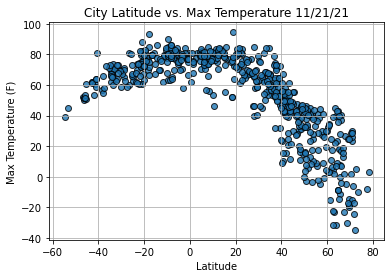

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

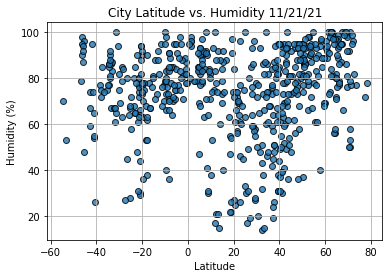

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

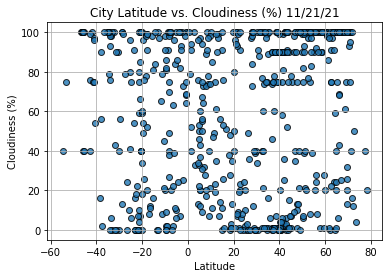

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

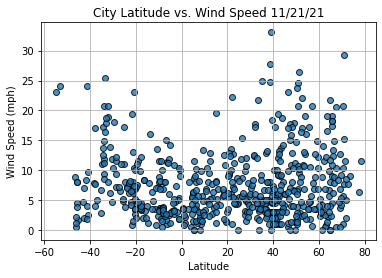

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
 # Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tokur,RU,2021-11-21 22:01:03,53.1333,132.9000,-3.55,93,100,4.00
1,Torbay,CA,2021-11-21 22:01:03,47.6666,-52.7314,30.76,79,13,4.00
3,Estacion Coahuila,MX,2021-11-21 22:01:03,32.1939,-115.0017,80.96,14,100,17.76
4,Portland,US,2021-11-21 21:58:24,45.5234,-122.6762,55.47,81,75,3.00
5,Qaanaaq,GL,2021-11-21 21:59:09,77.4840,-69.3632,-8.21,72,40,6.38


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

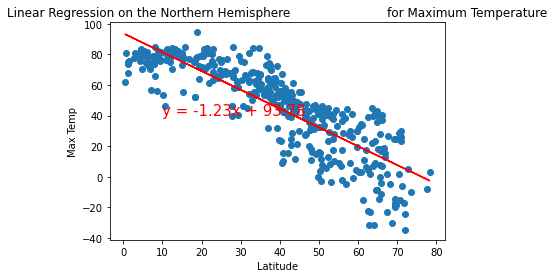

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

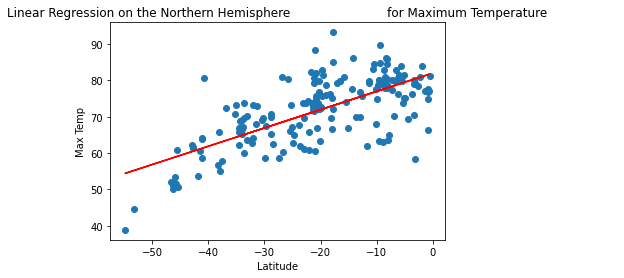

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

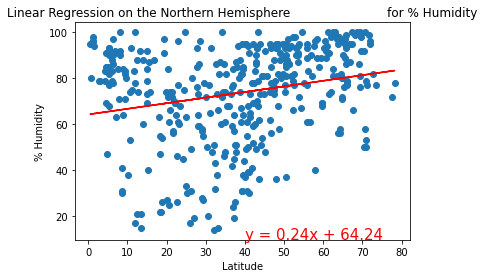

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

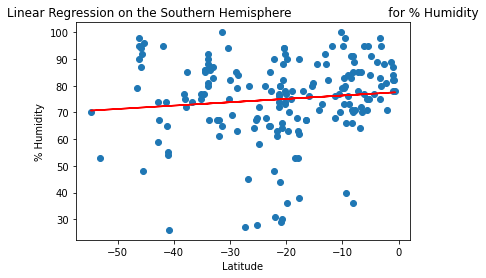

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

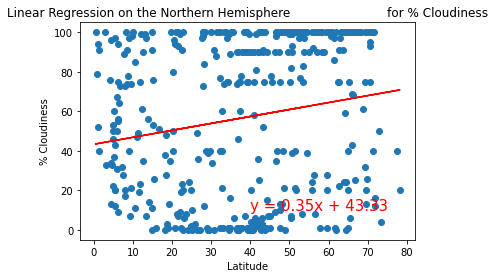

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

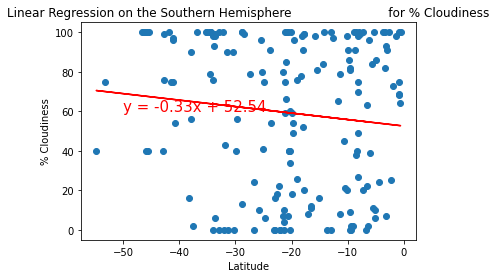

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

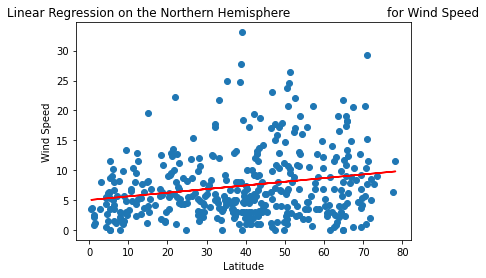

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

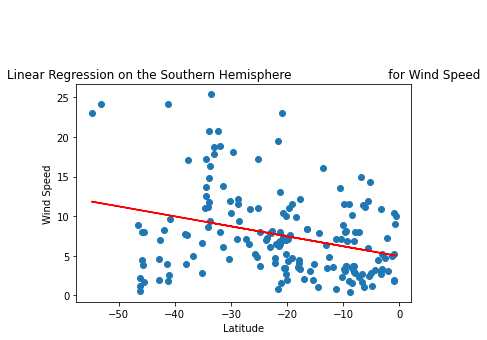

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))